<a href="https://colab.research.google.com/github/mcannoni/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Definicion de objetivo





El objetivo del trabajo es poder predecir resultados de partidos, con el fin de poder ayudar a las casas de apuestas a maximizar sus ganancias.

## Contexto comercial

Las casas de apuestas existieron históricamente, pero no siempre fueron legales. Actualmente las mismas están reguladas e incluso en las transmisiones de partidos, se realizan publicidades de casas de apuestas, generando que gran parte de los fanáticos se sumen a esa práctica. Ello sumado a la facilidad con la que pueden realizarse, debido a la tecnología, hace que se esté convirtiendo en una práctica muy común y por ende, nuevas casas de apuestan van surgiendo. Es un rubro que está en auge.


## Problema comercial

Como quienes realizan las apuestan son generalmente sujetos fanáticos del fútbol, hace que la probabilidad de acertar sea mucho mayor. Es por eso que al poder predecir los resultados, los valores de paga pueden disminuirse o aumentarse, en caso de que un equipo tenga más probabilidad de ganar o perder, respectivamente.

##Contexto analitico

**BASE DE DATOS DE FÚTBOL**

El dataset escogido es relacionado al fútbol. Tiene una muy completa información desde el 2014 hasta el 2020.
El mismo se encuentra dividido en 7 partes.
En el dataset "appearences" se hallan estadísticas de cada futbolista en cada aparición en un partido. Tales como goles, disparos, asistencias, posición, tarjeta amarilla, tarjeta roja, cuánto tiempo jugó, si lo sustituyeron.
El dataset "games" refiere a estadísticas relacionadas con los partidos disputados en dicho rango de tiempo. En el mismo se encuentra, como lo más sobresaliente, la temporada, el día y la hora en el que se disputó el encuentro, qué equipos lo hicieron, los goles convertidos por parte de cada uno.
El dataset "leagues" refiere a las 5 ligas más importantes del mundo, de las cuales se obtuvieron la información. Estas son la española, la inglesa, la italiana, la alemana y la francesa.
El dataset "players" es acerca de todos los jugadores que disputaron partidos en dicho periodo de tiempo y en dichas ligas.
El dataset "shots" es sobre los disparos efectuados por los jugadores en los partidos, en qué minuto de juego, en qué situación de juego, con qué parte del cuerpo y el resultado de ese remate, entre otras.
El dataset "teams" se refiere a los equipos que disputaron los partidos en las ligas y periodo mencionados anteriormente.
El dataset "teamstats" es acerca de las estadísticas de cada equipo en cada partido, tales como el año que se disputó, el día y la hora, en qué condición lo hizo, la cantidad de goles que realizó y le concedieron, los disparos, las faltas, los corners, las tarjetas amarillas y rojas.

Teniendo en cuenta toda esta información surgen algunas preguntas, las cuales se van a resolver en este trabajo, como lo son:


*   ¿El equipo local, gana mucho más que el visitante?
*   ¿A medida que avanza el tiempo, es más fácil o más difícil hacer goles? Teniendo en cuenta que se estudia mucho más al rival, su manera de jugar, y se analizan datos estadísticos.


*   ¿Todas las ligas disputan la misma cantidad de partidos, es decir los jugadores sufren igual degaste en todas las ligas?
*   ¿Se mantienen constante los partidos disputados en las ligas durante todo el año?


*   ¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?
*   ¿Los jugadores con más goles, son los más reconocidos mundialmente?








---



In [ ]:
import sqlite3
import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

In [ ]:
# df_games = pd.read_csv("games.csv")
# df_teams = pd.read_csv("teams.csv")
# df_teamstats = pd.read_csv("teamstats.csv")
# df_leagues = pd.read_csv("leagues.csv")
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")


df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/games.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/teams.csv")
df_teamstats = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/teamstats.csv")
df_leagues = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/leagues.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/appearances.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/players.csv", encoding="ISO-8859-1")
df_shots = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/shots.csv")

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [ ]:
df_teamstats_away = df_teamstats.loc[df_teamstats["location"] == "a"]
df_teamstats_home = df_teamstats.loc[df_teamstats["location"] == "h"]
df_teamstats_merged = pd.merge(
    df_teamstats_home, df_teamstats_away, on="gameID", suffixes=["_home", "_away"]
)

df_games_merged_with_teamstats = pd.merge(
    df_games, df_teamstats_merged, on="gameID", suffixes=("", "_remove")
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    df_games_merged_with_teamstats.iloc[:, 13:34], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["homeProbability", "drawProbability", "awayProbability"], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["teamID_home", "teamID_away"], axis=1
)

df_games_merged_with_leagues = pd.merge(
    df_games_merged_with_teamstats, df_leagues, on="leagueID"
)

df_games_merged_with_team = pd.merge(
    df_games_merged_with_leagues,
    df_teams,
    left_on=["homeTeamID"],
    right_on=["teamID"],
    how="left",
)
df_games_merged_with_team = pd.merge(
    df_games_merged_with_team,
    df_teams,
    left_on=["awayTeamID"],
    right_on=["teamID"],
    how="left",
)

df_f_game = df_games_merged_with_team.rename(
    columns={"name_x": "liga", "name_y": "home_name", "name": "away_name"}
)
df_f_game = df_f_game.drop(
    [
        "understatNotation",
        "season_home",
        "date_home",
        "location_home",
        "goals_away",
        "goals_home",
        "season_away",
        "date_away",
        "location_away",
        "location_away",
        "teamID_x",
        "teamID_y",
    ],
    axis=1,
)



df_appearances_merged_with_players = pd.merge(
    df_appearances, df_players, on="playerID", suffixes=("", "_remove"))

df_f_game.to_csv("df_f_game.csv")
df_f_game['month'] = pd.DatetimeIndex(df_f_game['date']).month

In [ ]:
df_f_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameID              12680 non-null  int64  
 1   leagueID            12680 non-null  int64  
 2   season              12680 non-null  int64  
 3   date                12680 non-null  object 
 4   homeTeamID          12680 non-null  int64  
 5   awayTeamID          12680 non-null  int64  
 6   homeGoals           12680 non-null  int64  
 7   awayGoals           12680 non-null  int64  
 8   homeGoalsHalfTime   12680 non-null  int64  
 9   awayGoalsHalfTime   12680 non-null  int64  
 10  xGoals_home         12680 non-null  float64
 11  shots_home          12680 non-null  int64  
 12  shotsOnTarget_home  12680 non-null  int64  
 13  deep_home           12680 non-null  int64  
 14  ppda_home           12680 non-null  float64
 15  fouls_home          12680 non-null  int64  
 16  corn

In [ ]:
df_f_game.describe()

,gameID,leagueID,season,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime,xGoals_home,shots_home,shotsOnTarget_home,deep_home,ppda_home,fouls_home,corners_home,yellowCards_home,redCards_home,xGoals_away,shots_away,shotsOnTarget_away,deep_away,ppda_away,fouls_away,corners_away,yellowCards_away,redCards_away,month
count,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12679.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000
mean,7877.707334,2.983912,2016.984148,135.324842,135.333517,1.533202,1.206625,0.674054,0.526262,1.502215,13.706782,4.742350,6.424132,10.495906,12.796136,5.487618,1.922470,0.089984,1.178646,11.216719,3.892587,5.216798,11.835520,13.114984,4.467823,2.142035,0.116404,6.491325
std,4753.774045,1.437191,2.000075,42.757999,42.767761,1.306732,1.167718,0.830917,0.734664,0.891745,5.264559,2.578636,4.276387,5.609321,4.152450,2.955970,1.352601,0.303297,0.776568,4.656769,2.281611,3.713931,6.925258,4.249684,2.603438,1.374253,0.340057,3.847936
min,81.000000,1.000000,2014.000000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.897400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.122000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3812.750000,2.000000,2015.000000,101.000000,101.000000,1.000000,0.000000,0.000000,0.000000,0.836919,10.000000,3.000000,3.000000,6.814800,10.000000,3.000000,1.000000,0.000000,0.593479,8.000000,2.000000,3.000000,7.483625,10.000000,3.000000,1.000000,0.000000,3.000000
50%,7981.500000,3.000000,2017.000000,132.000000,132.000000,1.000000,1.000000,0.000000,0.000000,1.343710,13.000000,4.000000,6.000000,9.250000,13.000000,5.000000,2.000000,0.000000,1.032105,11.000000,4.000000,4.000000,10.229700,13.000000,4.000000,2.000000,0.000000,6.000000
75%,12023.250000,4.000000,2019.000000,163.000000,163.000000,2.000000,2.000000,1.000000,1.000000,2.007617,17.000000,6.000000,9.000000,12.613525,15.000000,7.000000,3.000000,0.000000,1.597970,14.000000,5.000000,7.000000,14.190950,16.000000,6.000000,3.000000,0.000000,10.000000
max,16135.000000,5.000000,2020.000000,262.000000,262.000000,10.000000,9.000000,6.000000,5.000000,6.630490,47.000000,18.000000,42.000000,97.333300,33.000000,20.000000,8.000000,3.000000,6.186960,39.000000,15.000000,28.000000,152.000000,32.000000,19.000000,9.000000,3.000000,12.000000


In [ ]:
df_f_game.isna().sum()

gameID                0
leagueID              0
season                0
date                  0
homeTeamID            0
awayTeamID            0
homeGoals             0
awayGoals             0
homeGoalsHalfTime     0
awayGoalsHalfTime     0
xGoals_home           0
shots_home            0
shotsOnTarget_home    0
deep_home             0
ppda_home             0
fouls_home            0
corners_home          0
yellowCards_home      1
redCards_home         0
result_home           0
xGoals_away           0
shots_away            0
shotsOnTarget_away    0
deep_away             0
ppda_away             0
fouls_away            0
corners_away          0
yellowCards_away      0
redCards_away         0
result_away           0
liga                  0
home_name             0
away_name             0
month                 0
dtype: int64

**¿El equipo local, gana mucho más que el visitante?**

<AxesSubplot: ylabel='gameID'>

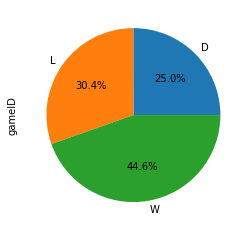

In [ ]:
df_f_game.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

Como era de esperarse el equipo local resulta más victorioso que el visitante, aunque la diferencia es más acotada de lo que podíamos pensar.
L = Derrota del local
D = Empate
W = Victoria del local

** ¿A medida que avanza el tiempo, es más fácil o más difícil hacer goles?**

<AxesSubplot: xlabel='season'>

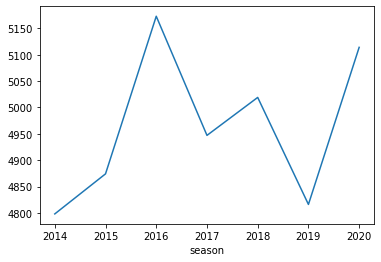

In [ ]:
df_f_game["totalGoals"]= df_f_game["homeGoals"]  + df_f_game["awayGoals"]
df_f_game["goal_diff"]= abs(df_f_game["homeGoals"]  - df_f_game["awayGoals"])

df_f_game["diff_labels"]= df_f_game['goal_diff'].apply(lambda x: str(x) if x<4 else '4 o mas' )

df_f_game.groupby(['season'])['totalGoals'].sum().plot()


Como puede apreciarse en el gráfico, no existe una relación sobre la hipótesis planteada, ya que si bien parecía que la tendencia después del año 2016 era decreciente hasta el año 2019, en el año 2020 se revirtió y casi igualó la cúspide alcanzada en el año 2016 del rango de tiempo analizado.

**¿Todas las ligas disputan la misma cantidad de partidos, es decir los jugadores sufren igual degaste en todas las ligas?**

<AxesSubplot: xlabel='liga,season'>

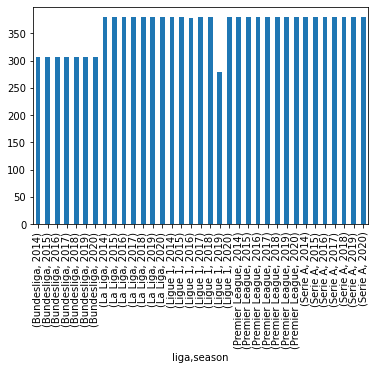

In [ ]:
df_f_game.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

Como conclusión se puede obtener que los jugadores que juegan en la liga alemana (Bundesliga) sufren un menor desgaste que los que disputan las demás ligas, ya que tienen una gran diferencia de partidos jugados por año.

**¿Se mantienen constante los partidos disputados en las ligas durante todo el año?**



Text(0.5, 1.0, 'Ligue 1')

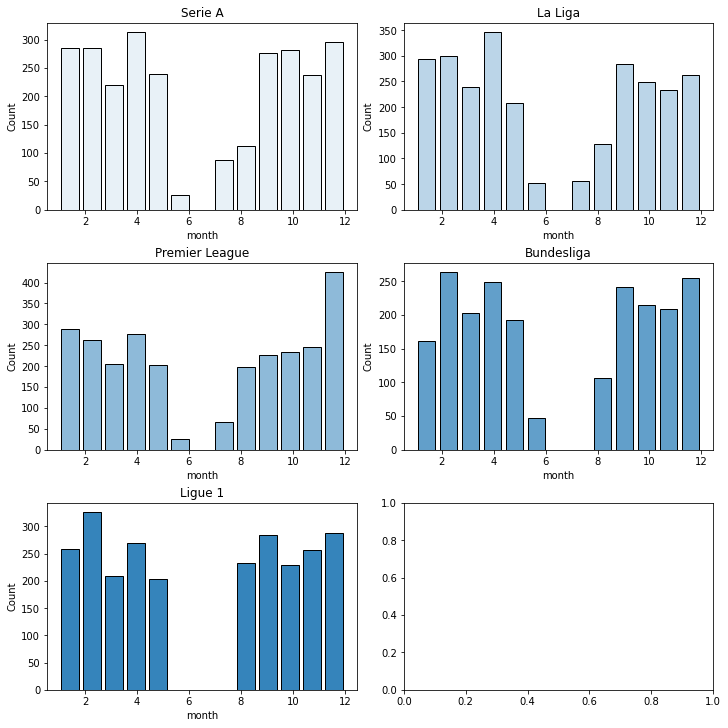

In [ ]:
df_f_game_seriea=df_f_game.loc[df_f_game['liga']=="Serie A"]
df_f_game_laliga=df_f_game.loc[df_f_game['liga']=="La Liga"]
df_f_game_premier=df_f_game.loc[df_f_game['liga']=="Premier League"]
df_f_game_bundesliga=df_f_game.loc[df_f_game['liga']=="Bundesliga"]
df_f_game_ligue1=df_f_game.loc[df_f_game['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10), constrained_layout = True)

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.1, legend=False,ax=axis[0,0]).set_title("Serie A")
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.3, legend=False,ax=axis[0,1]).set_title("La Liga")
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.5, legend=False,ax=axis[1,0]).set_title("Premier League")
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.7, legend=False,ax=axis[1,1]).set_title("Bundesliga")
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.9, legend=False,ax=axis[2,0]).set_title("Ligue 1")



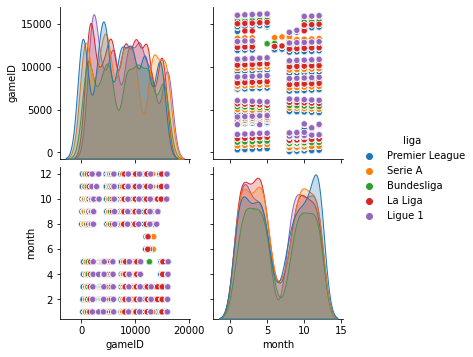

In [ ]:
data=df_f_game.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")

Se puede comprobar que en promedio hay una cantidad de 250 y 300 partidos por mes. A su vez, se refleja una merma en la cantidad de los mismos entre los meses de junio a agosto, debido al receso existente entre el fin de la temporada y comienzo de la nueva.
Como dato a destacar, se puede visualizar la gran cantidad de partidos que hay en Inglaterra en el mes de diciembre, debido a que existe el Boxing Day, la fecha que se juega siempre en Navidad.

**¿Que liga es la más atractiva para ver fútbol, o sea en cual hay más goles por partido?**

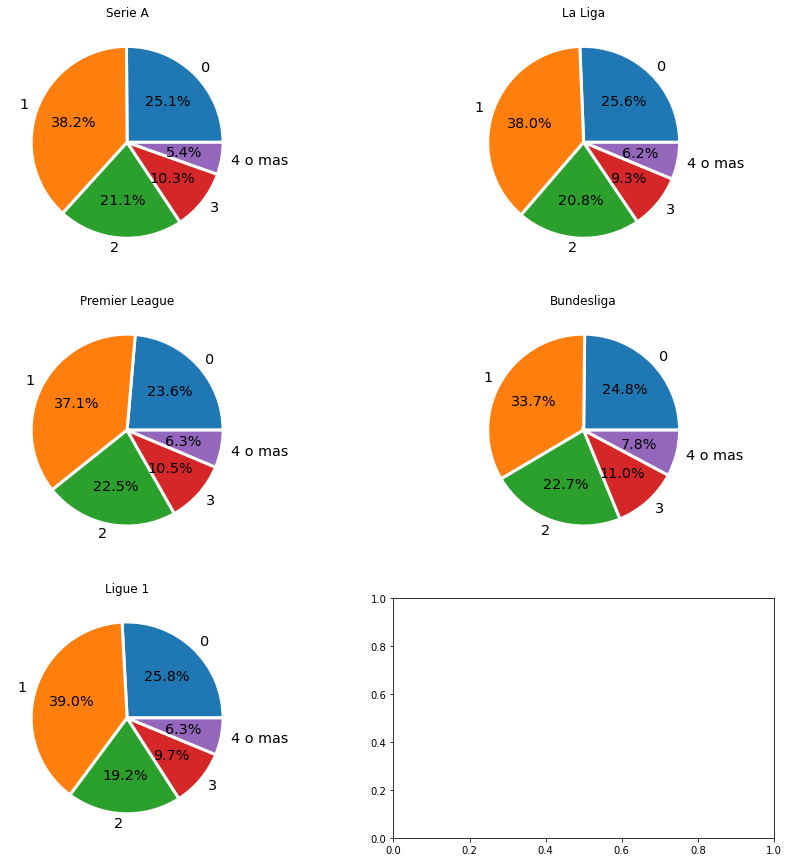

In [ ]:

x_seriea=df_f_game_seriea.groupby(['diff_labels'])['gameID']
x_laliga=df_f_game_laliga.groupby(['diff_labels'])['gameID']
x_premier=df_f_game_premier.groupby(['diff_labels'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['diff_labels'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['diff_labels'])['gameID']




fig, ax = plt.subplots(3, 2, figsize=(15, 15))
autopct='%.1f%%'
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
textprops={'size': 'x-large'}
ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

Como se puede visualizar en los gráficos, la Bundesliga y la Premier League son las más atractiva, debido a que son las que tienen el porcentaje más alto de varios goles por partido. También son las que tienen el menor porcentaje de 0 goles por partido.

**¿Los jugadores con más goles, son los más reconocidos mundialmente?**

In [ ]:
# df_games 
# df_teams 
# df_teamstats 
# df_leagues 
# df_appearances 
# df_players
# df_shots 

df_p_app= pd.merge(
    df_appearances,
    df_players,
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)


df_p_app= pd.merge(
    df_p_app,
    df_games[['gameID','season']],
    on='gameID',
    how="left",
)
df_prob_stats= pd.merge(
    df_p_app[["gameID","goals","playerID","xGoals","xGoalsChain","xGoalsBuildup","xAssists",'season']],
    df_players[['name',"playerID"]],
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)

df_prob_stats= df_prob_stats[['gameID','season','name', 'playerID', 'goals', 'xGoals', 'xGoalsChain', 'xGoalsBuildup',
       'xAssists' ]]




c:\Users\Mati\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


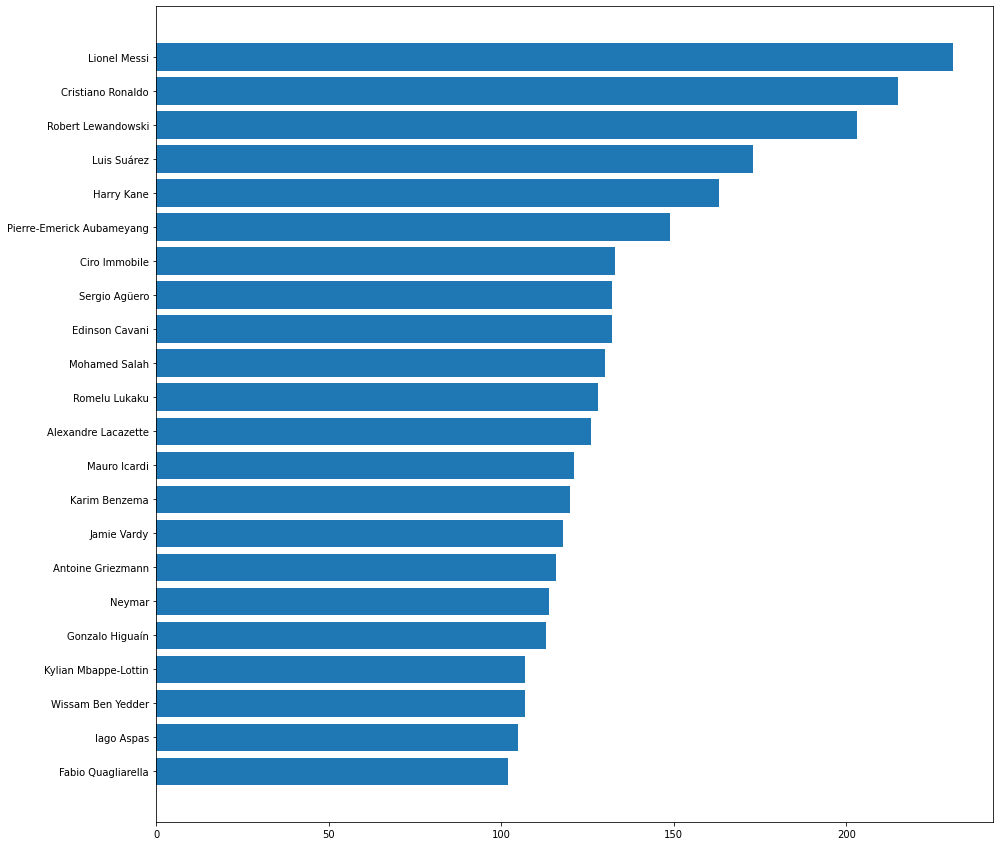

In [ ]:
grouped_goal_total=df_prob_stats.groupby(["name"],as_index=False)["goals"].sum()

mas_de_100=grouped_goal_total.loc[grouped_goal_total['goals']>100]
mas_de_100.sort_values(by='goals',inplace=True )

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(list(mas_de_100["name"])  ,  list(mas_de_100['goals'])  )

df_filtered=df_prob_stats[df_prob_stats['name'].isin(mas_de_100['name'])]
df_filtered=df_filtered.groupby(["name",'season'],as_index=False)["goals"].sum()
df_filtered.sort_values(by=['season',"name"],inplace=True)

Como puede comprobarse en el gráfico precendete, tanto Lionel Messi como Cristiano Ronaldo, las máximas figuras de los últimos años, lideran la tabla de artilleros del periodo analizado, superando los 200 goles a nivel clubes.

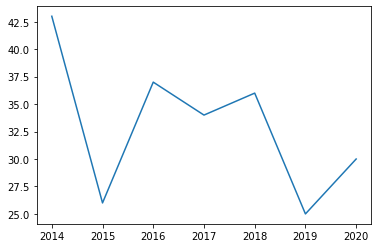

In [ ]:
fig1, ax1 = plt.subplots()

ax1.plot(df_filtered[df_filtered['name'].str.contains("Lionel Messi")].season,   df_filtered[df_filtered['name'].str.contains("Lionel Messi")].goals, label=df_filtered[df_filtered['name'].str.contains("Lionel Messi")].name)

En este último gráfico se puede observar como fue variando los goles de Lionel Messi a lo largo del periodo de tiempo en cuestión. Después de una espectacular temporada en el 2014, su rendimiento mermó, lógicamente por una cuestión natural como es la edad.

<AxesSubplot: xlabel='xGoals_home_prom', ylabel='xGoals_away_prom'>

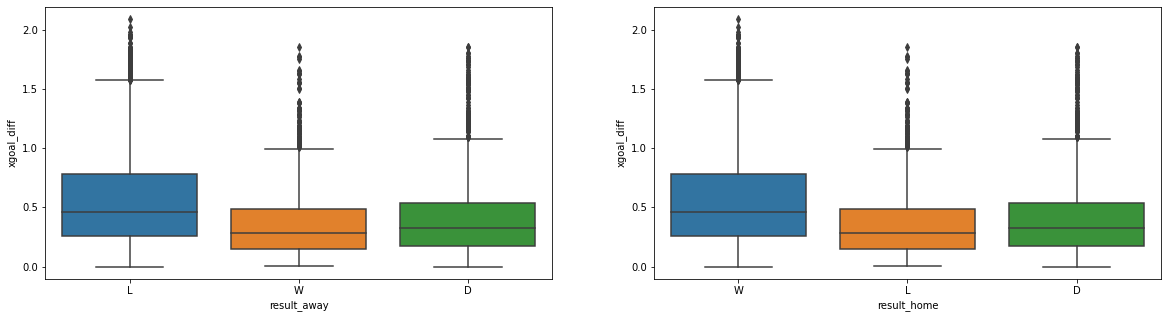

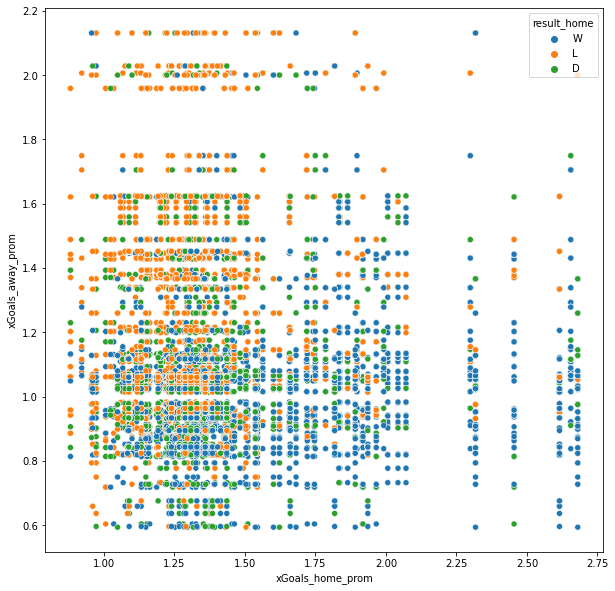

In [ ]:
prom_home_xgoal=df_f_game.groupby(['homeTeamID'],as_index=False)
prom_away_xgoal=df_f_game.groupby(['awayTeamID'],as_index=False)
prom_home_xgoal=prom_home_xgoal['xGoals_home'].mean().sort_values(by="xGoals_home",ascending=False)
prom_away_xgoal=prom_away_xgoal['xGoals_away'].mean().sort_values(by="xGoals_away",ascending=False)



df_f_game=pd.merge(df_f_game,prom_home_xgoal,   
    
    
    left_on="homeTeamID",
    right_on="homeTeamID",
    suffixes=("", "_prom")
  )


df_f_game=pd.merge(df_f_game,prom_away_xgoal,   
    
    
    left_on="awayTeamID",
    right_on="awayTeamID",
    suffixes=("", "_prom")
  )
df_f_game


df_f_game["xgoal_diff"]= abs(df_f_game["xGoals_home_prom"]  - df_f_game["xGoals_away_prom"])


figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_f_game.result_away, y=df_f_game.xgoal_diff, data=df_f_game,ax=axesbi[0])
sns.boxplot(x=df_f_game.result_home, y=df_f_game.xgoal_diff, data=df_f_game,ax=axesbi[1])
figbi, axesbi = plt.subplots( figsize=(10, 10))

sns.scatterplot(x=df_f_game.xGoals_home_prom, y=df_f_game.xGoals_away_prom, hue=df_f_game.result_home)

In [ ]:
indexwin = df_f_game[ (df_f_game['result_home'] == "W") & (df_f_game['xgoal_diff'] > 1.4) ].index
indexlost = df_f_game[ (df_f_game['result_home'] == "L") & (df_f_game['xgoal_diff'] > 0.9) ].index
indextie = df_f_game[ (df_f_game['result_home'] == "D") & (df_f_game['xgoal_diff'] > 1) ].index


df_f_game.drop(indexwin , inplace=True)
df_f_game.drop(indexlost , inplace=True)
df_f_game.drop(indextie , inplace=True)

<AxesSubplot: xlabel='xGoals_home_prom', ylabel='xGoals_away_prom'>

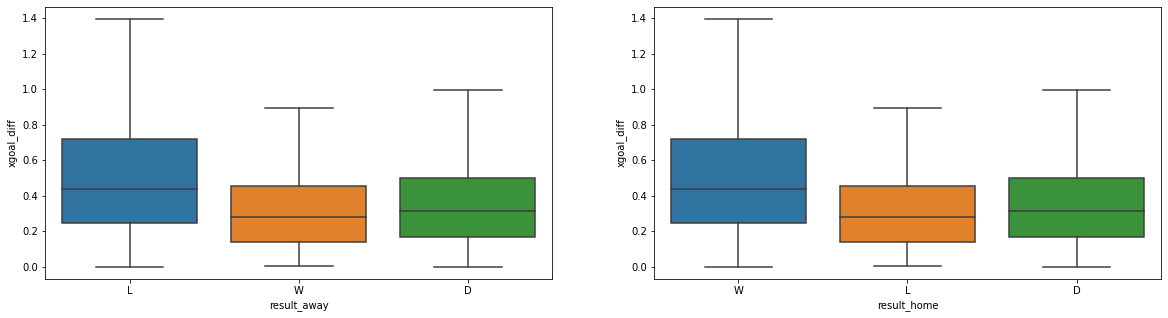

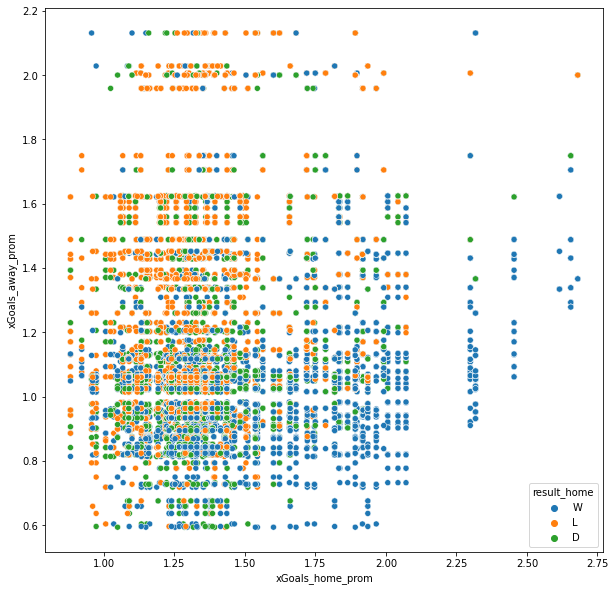

In [ ]:
df_f_game["xgoal_diff"]= abs(df_f_game["xGoals_home_prom"]  - df_f_game["xGoals_away_prom"])


figbi, axesbi = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df_f_game.result_away, y=df_f_game.xgoal_diff, data=df_f_game,ax=axesbi[0])
sns.boxplot(x=df_f_game.result_home, y=df_f_game.xgoal_diff, data=df_f_game,ax=axesbi[1])
figbi, axesbi = plt.subplots( figsize=(10, 10))

sns.scatterplot(x=df_f_game.xGoals_home_prom, y=df_f_game.xGoals_away_prom, hue=df_f_game.result_home)